In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
#import data and provide friendly column names
crime_raw = pd.read_csv('Thinkful Files/nyc_crimedata.csv')
crime_raw.rename(columns={'City': 'city',
                         'Population': 'population',
                         'Violent\ncrime': 'violent_crime',
                         'Murder and\nnonnegligent\nmanslaughter': 'murder',
                         'Rape\n(revised\ndefinition)1': 'rape_legacy',
                         'Rape\n(legacy\ndefinition)2': 'rape',
                         'Robbery': 'robbery',
                         'Aggravated\nassault': 'aggravated_assault',
                         'Property\ncrime': 'property_crime',
                         'Burglary': 'burglary',
                         'Larceny-\ntheft': 'larceny_theft',
                         'Motor\nvehicle\ntheft': 'vehicle_theft',
                         'Arson3': 'arson',
                         'Unnamed: 13': 'unnamed'}, inplace=True)

In [3]:
#drop columns with no data and final 3 rows, which were footnotes
crime_raw.drop(['rape_legacy', 'unnamed'], axis=1, inplace=True)
crime_raw.drop(crime_raw.index[-3:], inplace=True)
crime_raw.drop(crime_raw.index[216], inplace=True)

In [4]:
#remove commas from all columns with them, and change all numerics to floats
cols = crime_raw.columns.drop('city')

crime_raw['population'] = crime_raw['population'].str.replace(',', '')
crime_raw['violent_crime'] = crime_raw['violent_crime'].str.replace(',', '')
crime_raw['rape'] = crime_raw['rape'].str.replace(',', '')
crime_raw['robbery'] = crime_raw['robbery'].str.replace(',', '')
crime_raw['aggravated_assault'] = crime_raw['aggravated_assault'].str.replace(',', '')
crime_raw['property_crime'] = crime_raw['property_crime'].str.replace(',', '')
crime_raw['burglary'] = crime_raw['burglary'].str.replace(',', '')
crime_raw['larceny_theft'] = crime_raw['larceny_theft'].str.replace(',', '')
crime_raw['vehicle_theft'] = crime_raw['vehicle_theft'].str.replace(',', '')

crime_raw[cols] = crime_raw[cols].astype(float)
crime_raw['city'] = crime_raw['city'].dropna()
crime_raw[cols] = crime_raw[cols].fillna(0)

In [5]:
#create a new dataframe, and add desired factors
crime_df = pd.DataFrame()
crime_df['property_crime'] = crime_raw['property_crime']
crime_df['population'] = crime_raw['population']
crime_df['population_sqr'] = crime_df['population'].pow(2)
crime_df['murder'] = crime_raw['murder']
crime_df['robbery'] = crime_raw['robbery']
#convert murder and robbery to categorical var, where any incident is marked 1.
crime_df['murder_cat'] = np.where(crime_df['murder'] > 0, 1, 0)
crime_df['robbery_cat'] = np.where(crime_df['robbery'] > 0, 1, 0)

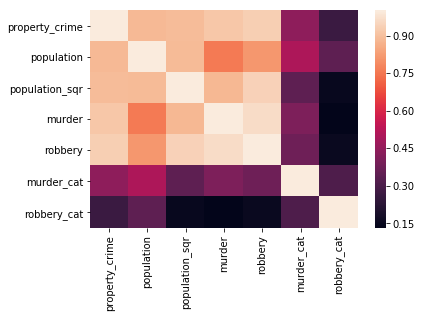

In [6]:
sns.heatmap(crime_df.corr())